In [1]:
import cv2
import sys
from matplotlib import pyplot as plt
import numpy as np

In [2]:
input_file_1 = 'brain.png'

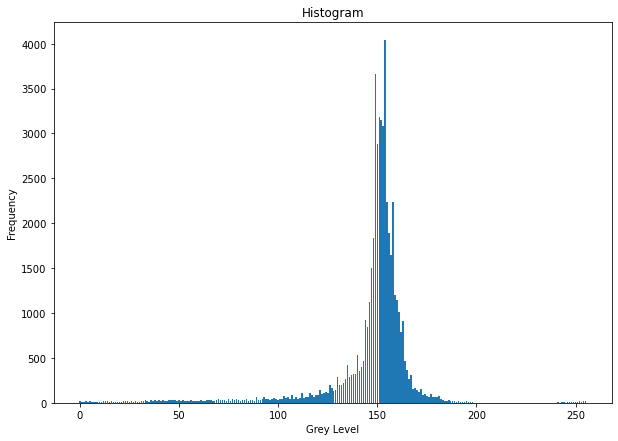

In [3]:
import cv2
import sys
from matplotlib import pyplot as plt
import numpy as np

input_file_1 = 'brain.png'
img = cv2.imread(input_file_1, cv2.IMREAD_GRAYSCALE)
#
# Check for success
if img is None:
    print('Failed to open', input_file_1)
    sys.exit()

# Calculate the histogram
hist = cv2.calcHist([img-50], [0], None, [256], [0, 256])
hist = hist.reshape(256)

# Plot histogram
plt.figure(figsize=(10,7))
plt.bar(np.linspace(0,255,256), hist)
plt.title('Histogram')
plt.ylabel('Frequency')
plt.xlabel('Grey Level')
plt.show()

Threshold value found by Otsu's method: 156.0


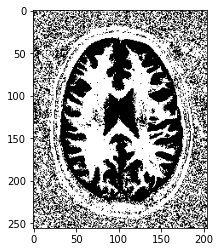

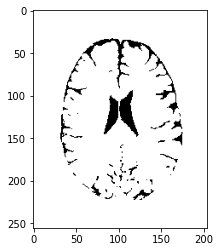

In [125]:
# Threshold manually at intensity level 150
# Note that threshold() returns the computued threshold value
# and the resulting image.  We don't need the value so we put
# it in _.

plt.figure()
# outputimg = np.clip((img * 2), 0, 255)
_, output = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)
cv2.imwrite('thresh_200.jpg', output)
plt.imshow(output,'gray')

# Threshold automatically with Otsu's method
# This time, we do want the computed threshold value
plt.figure()
T, output2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imwrite('thresh_otsu.jpg', output2)
print("Threshold value found by Otsu's method:", T)
plt.imshow(output2,'gray')

In [34]:
input_file_2 = 'tray.png'

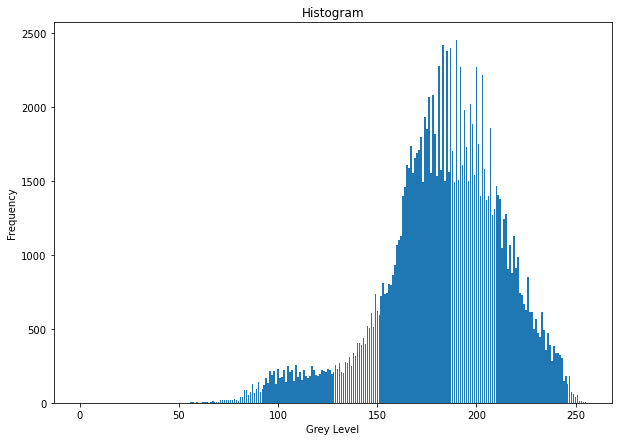

In [109]:
input_file_2 = 'tray.png'
img2 = cv2.imread(input_file_2, cv2.IMREAD_GRAYSCALE)
#
# Check for success
if img2 is None:
    print('Failed to open', input_file_2)
    sys.exit()

# Calculate the histogram
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])
hist2 = hist2.reshape(256)

# Plot histogram
plt.figure(figsize=(10,7))
plt.bar(np.linspace(0,255,256), hist2)
plt.title('Histogram')
plt.ylabel('Frequency')
plt.xlabel('Grey Level')
plt.show()

Threshold value found by Otsu's method: 177.0


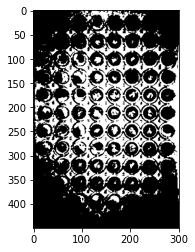

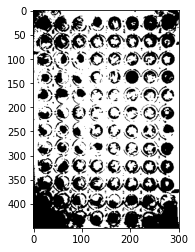

In [223]:
# Threshold manually at intensity level 150
# Note that threshold() returns the computued threshold value
# and the resulting image.  We don't need the value so we put
# it in _.

plt.figure()
_, output = cv2.threshold(img2, 200, 255, cv2.THRESH_BINARY)
cv2.imwrite('thresh2_200.jpg', output)
plt.imshow(output,'gray')

# Threshold automatically with Otsu's method
# This time, we do want the computed threshold value
plt.figure()
T, output2 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imwrite('thresh2_otsu.jpg', output2)
print("Threshold value found by Otsu's method:", T)
plt.imshow(output2,'gray')

In [36]:
# # Gaussian blurring
# blur1 = cv2.GaussianBlur(img2, (0,0), 3)
# cv2.imwrite('Tray_gaussian_sd3.jpg', blur1)
# #
# blur2 = cv2.GaussianBlur(img2, (0,0), 6)
# cv2.imwrite('Tray_gaussian_sd6.jpg', blur2)

True

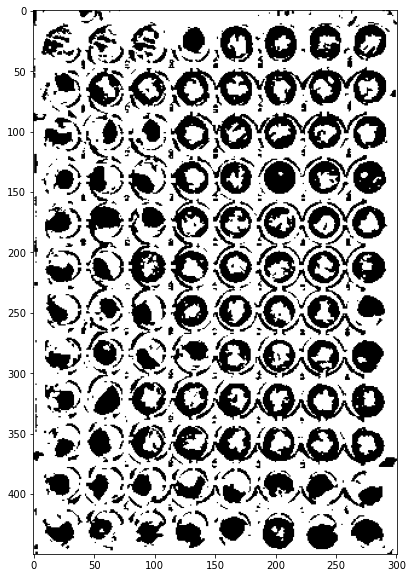

In [235]:
# Gaussian blurring
plt.figure(figsize=(10,10))
blur1 = cv2.GaussianBlur(img2, (0,0), 10)
cv2.imwrite('gaussian.jpg', blur1)
img_pro1 = cv2.subtract(img2, blur1) 
_, output = cv2.threshold(img_pro1, 0, 255, cv2.THRESH_BINARY)
plt.imshow(output,'gray')
cv2.imwrite('GaussianBlur1.jpg', output)


Threshold value found by Otsu's method: 120.0


True

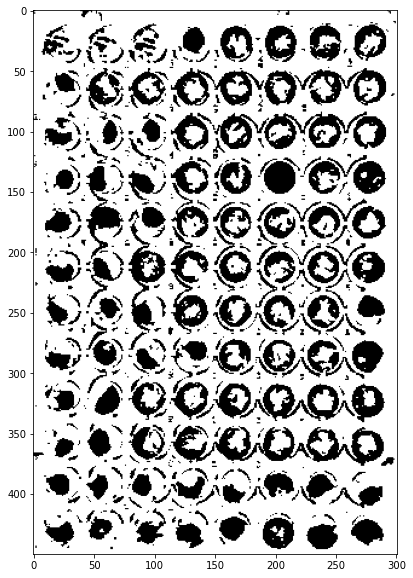

In [245]:
#Ostu's Method
plt.figure(figsize=(10,10))
blur2 = cv2.GaussianBlur(img2, (0,0), 12)
cv2.imwrite('gaussian2.jpg', blur2)
img_pro2 = img2- blur2- 128
T, output2 = cv2.threshold(img_pro2, 15, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(output2,'gray')
print("Threshold value found by Otsu's method:", T)
cv2.imwrite('GaussianBlur2.jpg', output2)

In [18]:
# img2 = img2 - blur2 + 128
# # Display image
# cv2.namedWindow('Source Image')
# cv2.imshow('Source Image', img2)
# while True:
#     if cv2.waitKey(1) == ord(' '):
#          break

# cv2.destroyAllWindows()

# 2 Labelling

In [32]:
import cv2
import sys
from matplotlib import pyplot as plt
import numpy as np
import random

In [33]:
input_file_3 = 'birds.jpg'
img3 = cv2.imread(input_file_3, cv2.IMREAD_GRAYSCALE)

if img3 is None:
    print('Failed to open', input_file_3)
    sys.exit()


492


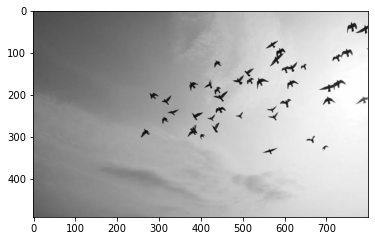

In [34]:
print(img3.shape[0])
plt.imshow(img3,'gray')

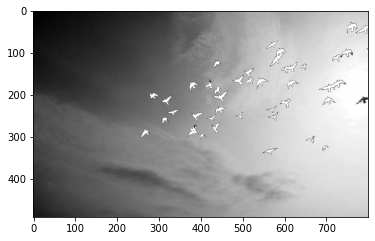

In [35]:
img_label = img3
for r in range(img_label.shape[0]):
    for c in range(img_label.shape[1]):
        if img_label[r, c] <= 76:
            img_label[r, c] = 255
plt.imshow(img_label,'gray')

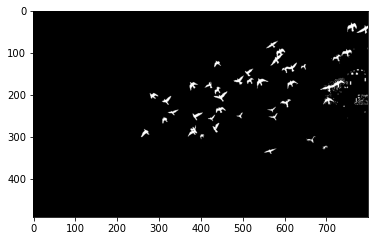

In [36]:
for r in range(img_label.shape[0]):
    for c in range(img_label.shape[1]):
        if img_label[r, c] != 255:
            img_label[r, c] = 0
plt.imshow(img_label,'gray')

492


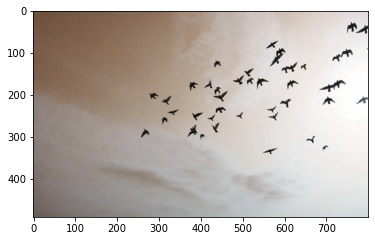

In [159]:
input_file_3 = 'birds.jpg'
img3 = cv2.imread(input_file_3)

print(img3.shape[0])
plt.imshow(img3)

In [160]:
print(img3.shape)

(492, 800, 3)


In [155]:
i= random.randint(0,255)
print(i)

14


threshold:  70.0


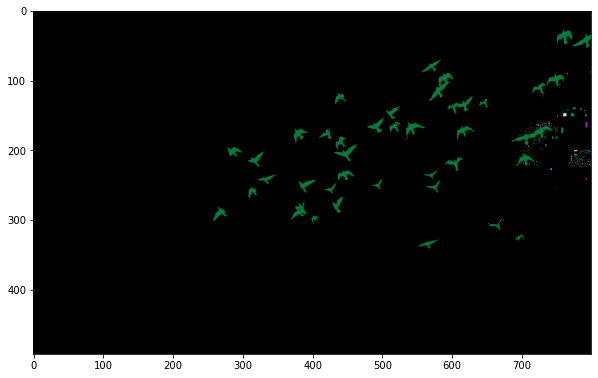

In [38]:
from PIL import Image, ImageOps
import cv2 as cv
import numpy as np
import sys
from matplotlib import pyplot as plt
import random

filename = './birds.jpg'
img = cv.imread(filename)

if img is None:
    print('Error: failed to open image: ', filename)
    sys.exit()

grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imwrite('birds_grey.jpg', grey)

threshold, output = cv.threshold(grey, 70, 255, cv.THRESH_BINARY_INV)
print('threshold: ', threshold)
cv.imwrite('birds_bin.jpg', output)

fa = {}

def find(x):
    if x not in fa.keys():
        fa[x] = x
        return x
    y = x
    while fa[y] != y:
        y = fa[y]
    while fa[x] != x:
        z = fa[x]
        fa[x] = y
        x = z
    return y

def union(x, y):
    fa[find(x)] = find(y)


# first pass
def one_pass(img):
    if len(img) == 0:
        return img
    # label to store latest label value
    current_label = 1
    for i in range(len(img)):
        # ret_row stands for label from every row in image
        for j in range(len(img[0])):
            if img[i][j]:
                left = 0 if j == 0 else img[i][j - 1]
                above = 0 if i == 0 else img[i - 1][j]
                # if left and above are neither labeled
                if not left and not above:
                    img[i][j] = current_label
                    current_label += 1
                elif left and not above:
                    img[i][j] = left
                elif above and not left:
                    img[i][j] = above
                else:
                    union(left, above)
                    img[i][j] = find(left)

    return img

#Second pass
def two_pass(metric):
    if len(metric) == 0:
        return []
    for i in range(len(metric)):
        for j in range(len(metric[0])):
            if metric[i][j] in fa.keys():
                metric[i][j] = find(metric[i][j])
    return metric
                    


def colourize(img):
    height, width = img.shape

    colors = []
    colors.append([])
    colors.append([])
    color = 1
    # Displaying distinct components with distinct colors
    coloured_img = Image.new("RGB", (width, height))
    coloured_data = coloured_img.load()

    for i in range(len(img)):
        for j in range(len(img[0])):
            if img[i][j] > 0:
                if img[i][j] not in colors[0]:
                    colors[0].append(img[i][j])
                    colors[1].append((random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)))

                ind = colors[0].index(img[i][j])
                coloured_data[j, i] = colors[1][ind]

    return coloured_img

res = two_pass(one_pass(output))

plt.figure(figsize=(10,10))
cv.imwrite('res.jpg', np.array(res))
coloured_img = colourize(res)
plt.imshow(coloured_img)
plt.show()

# plt.figure()
# plt.imshow(np.array(res),'gray')


threshold:  70.0
Start first pass
Start second pass
(492, 800, 3)


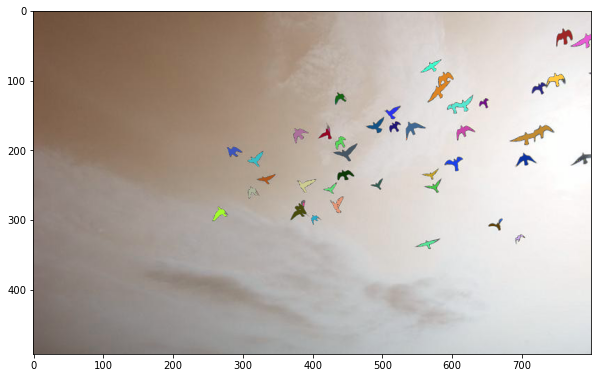

True

In [262]:
import cv2 as cv
import numpy as np
import sys
from matplotlib import pyplot as plt
import random
from PIL import Image, ImageOps


filename = './birds.jpg'
img = cv.imread(filename)

if img is None:
    print('Error: failed to open image: ', filename)
    sys.exit()

grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imwrite('birds_grey.jpg', grey)

threshold, output = cv.threshold(grey, 70, 255, cv.THRESH_BINARY_INV)
print('threshold: ', threshold)
cv.imwrite('birds_bin.jpg', output)

search = {}

def search_label(x):
    if x not in search.keys():
        search[x] = x
        return x
    while search[x] != x:
        x = search[x]
    return x

def relabel(x, y):
    if x > y:
        search[x] = y
    else:
        search[y] = x

# first pass
def one_pass(img):
    print('Start first pass')
    if len(img) == 0:
        return img
    label = np.zeros((len(img), len(img[0])), np.uint16)
    # label to store latest label value
    current_label = 1
    for i in range(len(img)):
        # ret_row stands for label from every row in image
        for j in range(len(img[0])):
            if img[i][j]:
                left = 0 if j == 0 else label[i][j - 1]
                above = 0 if i == 0 else label[i - 1][j]
                # if left and above are neither labeled
                if not left and not above:
                    label[i][j] = current_label
                    current_label += 1
                elif left and not above:
                    label[i][j] = left
                elif above and not left:
                    label[i][j] = above
                else:
                    if left == above:
                        label[i][j] = left
                    else:
                        relabel(left, above)
                        label[i][j] = search_label(min(left, above))

    return label

def two_pass(label):
    print('Start second pass')
    if len(label) == 0:
        return []
    for i in range(len(label)):
        for j in range(len(label[0])):
            if label[i][j]:
                label[i][j] = search_label(label[i][j])
    return label

def colourize(img):
    height, width = img.shape
    colors = []
    colors.append([])
    colors.append([])
    color = 1
    # Displaying distinct components with distinct colors
    coloured_img = Image.new("RGB", (width, height))
    coloured_data = coloured_img.load()

    for i in range(len(img)):
        for j in range(len(img[0])):
            if img[i][j] > 0:
                if img[i][j] not in colors[0]:
                    colors[0].append(img[i][j])
                    colors[1].append((random.randint(0, 255)
                                      , random.randint(0, 255)
                                      , random.randint(0, 255)))

                ind = colors[0].index(img[i][j])
                coloured_data[j, i] = colors[1][ind]

    return coloured_img
  
def getoriginal(orginalinput, img):
    orginalimage = np.array(orginalinput)
    arrayimg = np.array(img)
#     colored_orginalimg = np.zeros((arrayimg.shape[0],arrayimg.shape[1],arrayimg.shape[2]))
    for i in range(arrayimg.shape[0]):
        for j in range(arrayimg.shape[1]):
            for k in range(arrayimg.shape[2]):
                if arrayimg[i,j,k] == 0:
                    continue
                else:
                    orginalimage[i,j,k] = arrayimg[i,j,k]
    return orginalimage
                    
    
    
    
    
labelimage = two_pass(one_pass(output))
colorizedimage = colourize(labelimage)
print(np.array(img).shape)
colored_orginal_img =getoriginal(img, colorizedimage)
plt.figure(figsize=(10,10))
plt.imshow(colored_orginal_img)
plt.show()
cv.imwrite('colorizedimage.jpg', np.array(colorizedimage))
cv.imwrite('colorizedorginal.jpg', np.array(colored_orginal_img))



Threshold:  70.0
Start first pass
Start second pass
(492, 800, 3)


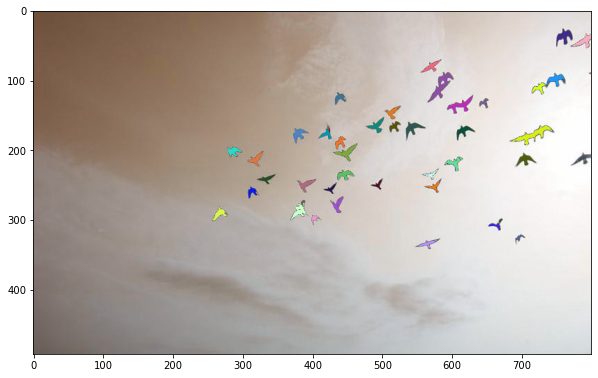

In [286]:
import cv2 as cv
import numpy as np
import sys
from matplotlib import pyplot as plt
import random
from PIL import Image, ImageOps


filename = './birds.jpg'
img = cv.imread(filename)

if img is None:
    print('Error: failed to open image: ', filename)
    sys.exit()

grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imwrite('birds_grey.jpg', grey)

threshold, output = cv.threshold(grey, 70, 255, cv.THRESH_BINARY_INV)
print('Threshold: ', threshold)
cv.imwrite('birds_bin.jpg', output)

edge = cv2.Canny(output, 180, 190)
cv.imwrite('birds_edge.jpg', edge)

#Label the pixel
def search_label(x):
    if x not in search.keys():
        search[x] = x
        return x
    while search[x] != x:
        x = search[x]
    return x

def relabel(x, y):
    if x > y:
        search[x] = y
    else:
        search[y] = x

# Two pass
def two_pass(img):
    print('Start first pass')
    if len(img) == 0:
        return img
    label = np.zeros((len(img), len(img[0])), np.uint16)
    # label to store latest label value
    current_label = 1
    for i in range(len(img)):
        # ret_row stands for label from every row in image
        for j in range(len(img[0])):
            if img[i][j]:
                left = 0 if j == 0 else label[i][j - 1]
                above = 0 if i == 0 else label[i - 1][j]
                # if left and above are neither labeled
                if not left and not above:
                    label[i][j] = current_label
                    current_label += 1
                elif left and not above:
                    label[i][j] = left
                elif above and not left:
                    label[i][j] = above
                else:
                    if left == above:
                        label[i][j] = left
                    else:
                        relabel(left, above)
                        label[i][j] = search_label(min(left, above))
    print('Start second pass')
    if len(label) == 0:
        return []
    for i in range(len(label)):
        for j in range(len(label[0])):
            if label[i][j]:
                label[i][j] = search_label(label[i][j])
    return label

def colourize(img):
    height, width = img.shape
    colors = []
    colors.append([])
    colors.append([])
    color = 1
    # Displaying distinct components with distinct colors
    coloured_img = Image.new("RGB", (width, height))
    coloured_data = coloured_img.load()

    for i in range(len(img)):
        for j in range(len(img[0])):
            if img[i][j] > 0:
                if img[i][j] not in colors[0]:
                    colors[0].append(img[i][j])
                    colors[1].append((random.randint(0, 255)
                                      , random.randint(0, 255)
                                      , random.randint(0, 255)))

                ind = colors[0].index(img[i][j])
                coloured_data[j, i] = colors[1][ind]

    return coloured_img
  
def getoriginal(orginalinput, img):
    orginalimage = np.array(orginalinput)
    arrayimg = np.array(img)
    for i in range(arrayimg.shape[0]):
        for j in range(arrayimg.shape[1]):
            for k in range(arrayimg.shape[2]):
                if arrayimg[i,j,k] == 0:
                    continue
                else:
                    orginalimage[i,j,k] = arrayimg[i,j,k]
    return orginalimage
                    
    
if __name__ == '__main__':



    # Create structuring element
    struc_elem = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4,4))
    
    output_erode = output.copy()
    for i in range(1):
        output_erode = cv2.erode(output_erode, struc_elem)
    #
    cv2.imwrite('eroded.jpg', output_erode)

    search = {}
    labelimage = two_pass(output)
    colorizedimage = colourize(labelimage)
    print(np.array(img).shape)
    colored_orginal_img =getoriginal(img, colorizedimage)
    plt.figure(figsize=(10,10))
    plt.imshow(colored_orginal_img)
    plt.show()
    cv.imwrite('colorizedimage.jpg', np.array(colorizedimage))
    cv.imwrite('colorizedorginal.jpg', np.array(colored_orginal_img))

